#  Инициализация весов нейронных сетей. Способы регуляризации нейронных сетей. Продвинутые алгоритмы градиентного спуска.

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.init.html
* https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/
* https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/
* https://pytorch.org/docs/stable/optim.html

## Задачи для совместного разбора

1\. Инициализируйте веса полносвязного слоя единицами, а смещения - нулями.

In [ ]:
import torch as th
import torch.nn as nn

In [ ]:
fc = nn.Linear(in_features=10, out_features=5)
fc

Linear(in_features=10, out_features=5, bias=True)

In [ ]:
fc.weight

In [ ]:
fc.bias

Parameter containing:
tensor([-0.1109, -0.0396,  0.0141, -0.0041, -0.0975], requires_grad=True)

In [ ]:
fc.weight = th.ones_like(fc.weight)

In [ ]:
fc.weight.data = th.ones_like(fc.weight)

In [ ]:
nn.init.ones_(fc.weight)

Parameter containing:
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True)

In [ ]:
fc.weight

Parameter containing:
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True)

2\. Изучите, как работает слой `nn.Dropout` в режиме обучения модели и в режиме использования модели.

In [ ]:
from sklearn.datasets import make_regression
import torch as th

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [ ]:
fc1 = nn.Linear(in_features=4, out_features=10)
relu = nn.ReLU()
fc2 = nn.Linear(in_features=10, out_features=1)
# ...

out = fc1(X)
out = relu(out)
out = fc2(out)
# ...

In [ ]:
class FullyConnectedNet(nn.Module):
  def __init__(self, n_inputs, n_hidden, n_out):
    super().__init__() # вызываем конструктор у родителя
    self.fc1 = nn.Linear(in_features=n_inputs, out_features=n_hidden)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(in_features=n_hidden, out_features=n_out)

  def forward(self, X):
    out = self.fc1(X)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [ ]:
n_inputs, n_hidden, n_out = 4, 10, 1

net = nn.Sequential(
    nn.Linear(in_features=n_inputs, out_features=n_hidden),
    nn.ReLU(),
    nn.Linear(in_features=n_hidden, out_features=n_out)
)

In [ ]:
net = FullyConnectedNet(n_inputs=4, n_hidden=10, n_out=1)
out = net(X)

In [ ]:
net

FullyConnectedNet(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=10, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
net.parameters()

<generator object Module.parameters at 0x7833ee562ce0>

In [ ]:
net(X)

In [ ]:
dropout = nn.Dropout(p=0.5)

In [ ]:
X = th.randn(size=(5, 5))
X

tensor([[ 1.0608,  0.8570,  0.7606, -0.5301,  0.8378],
        [ 0.2191, -1.0338, -0.7458,  1.3719, -0.4786],
        [ 1.6220, -0.7825,  0.2400,  1.0449,  1.0867],
        [-0.8164,  0.1449,  0.4850,  0.1737,  1.3978],
        [-0.8742,  0.1529, -1.2131, -0.2547,  0.3566]])

In [ ]:
dropout(X)

tensor([[ 2.1217,  1.7139,  1.5211, -1.0602,  1.6755],
        [ 0.0000, -2.0676, -1.4917,  2.7439, -0.0000],
        [ 0.0000, -0.0000,  0.4801,  2.0897,  0.0000],
        [-0.0000,  0.2899,  0.9701,  0.0000,  0.0000],
        [-0.0000,  0.3059, -2.4261, -0.0000,  0.7132]])

In [ ]:
dropout.eval()

Dropout(p=0.5, inplace=False)

In [ ]:
dropout(X)

tensor([[ 1.0608,  0.8570,  0.7606, -0.5301,  0.8378],
        [ 0.2191, -1.0338, -0.7458,  1.3719, -0.4786],
        [ 1.6220, -0.7825,  0.2400,  1.0449,  1.0867],
        [-0.8164,  0.1449,  0.4850,  0.1737,  1.3978],
        [-0.8742,  0.1529, -1.2131, -0.2547,  0.3566]])

In [ ]:
dropout.train()

Dropout(p=0.5, inplace=False)

In [ ]:
dropout(X)

tensor([[ 0.0000,  1.7139,  0.0000, -1.0602,  1.6755],
        [ 0.0000, -0.0000, -1.4917,  2.7439, -0.9572],
        [ 3.2439, -0.0000,  0.4801,  0.0000,  0.0000],
        [-1.6329,  0.2899,  0.0000,  0.3474,  2.7956],
        [-0.0000,  0.3059, -0.0000, -0.0000,  0.7132]])

In [ ]:
class FullyConnectedNet(nn.Module):
  def __init__(self, n_inputs, n_hidden, n_out, p=0.5):
    super().__init__() # вызываем конструктор у родителя
    self.fc1 = nn.Linear(in_features=n_inputs, out_features=n_hidden)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(in_features=n_hidden, out_features=n_out)
    self.dropout = nn.Dropout(p=p)

  def forward(self, X):
    out = self.fc1(X)
    out = self.relu(out)
    out = self.dropout(out)
    out = self.fc2(out)
    return out

In [ ]:
net = FullyConnectedNet(n_inputs=4, n_hidden=10, n_out=1, p=0.2)
# net.eval()
out = net(X)

3\. Изучите, как работает слой `nn.BatchNorm1d` в режиме обучения модели и в режиме использования модели.

In [ ]:
bn = nn.BatchNorm1d(num_features=4)

In [ ]:
X.shape

torch.Size([100, 4])

In [ ]:
out = bn(X)
out.mean(dim=0), out.std(dim=0)

(tensor([ 1.1921e-09,  9.5367e-09,  2.3842e-09, -5.9605e-09],
        grad_fn=<MeanBackward1>),
 tensor([1.0050, 1.0050, 1.0050, 1.0050], grad_fn=<StdBackward0>))

In [ ]:
bn.running_mean

tensor([ 0.0061,  0.0119,  0.0091, -0.0027])

In [ ]:
bn.running_var

tensor([1.0244, 0.9905, 0.9747, 0.9332])

In [ ]:
bn.eval()

BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [ ]:
class FullyConnectedNet(nn.Module):
  def __init__(self, n_inputs, n_hidden, n_out, p=0.5):
    super().__init__() # вызываем конструктор у родителя
    self.fc1 = nn.Linear(in_features=n_inputs, out_features=n_hidden)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(in_features=n_hidden, out_features=n_out)
    self.bn1 = nn.BatchNorm1d(num_features=n_hidden)

  def forward(self, X):
    out = self.fc1(X)
    out = self.bn1(out)
    out = self.relu(out)
    # out = self.bn1(out)
    out = self.fc2(out)
    #
    return out

## Задачи для самостоятельного решения

In [98]:
import torch
import torch as th
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.datasets import make_regression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_percentage_error

<p class="task" id="1"></p>

### 1
Расширьте класс `torch.nn.Linear`, описав класс `InitializedLinear` и добавив возможность инициализировать веса слоя при помощи функций из пакета `torch.nn.init`. Обратите внимание, что данные функции имеют дополнительные параметры. Данные параметры должны передаваться в момент создания объекта класса `InitializedLinear`.

Пример создания слоя:
```
InitializedLinear(n_features, n_hidden, init_f=nn.init.uniform_, init_args={"a": 0.0, "b": 1.0})
```

- [ ] Проверено на семинаре

In [115]:
class InitializedLinear(nn.Linear):
    def __init__(self, n_features, n_hidden, init_f=nn.init.uniform_, init_args=None):
        super().__init__(n_features, n_hidden)

        self.linear = nn.Linear(n_features, n_hidden)

        if init_args is not None:
            init_f(self.linear.weight, **init_args)
        else:
            init_f(self.linear.weight)

    def forward(self, x):
        return self.linear(x)


initialized_linear = InitializedLinear(10, 5, init_f=nn.init.uniform_, init_args={"a": 0.0, "b": 1.0})
initialized_linear

InitializedLinear(
  in_features=10, out_features=5, bias=True
  (linear): Linear(in_features=10, out_features=5, bias=True)
)

<p class="task" id="2"></p>

### 2
Решите задачу регрессии несколько раз, изменяя способ инициализации весов. Рассмотрите следующие варианты:
* `nn.init.uniform_`
* `nn.init.normal_`
* `nn.init.constant_`
* `nn.xavier_uniform_`
* `nn.kaiming_uniform_`

Визуализируйте график изменения значений MSE с ходом эпох. Дайте кривым, соответствующие разным способам инициализации, различные цвета и добавьте подписи. Для улучшения читаемости графиков можно рассматривать области экстремальных значений отдельно.

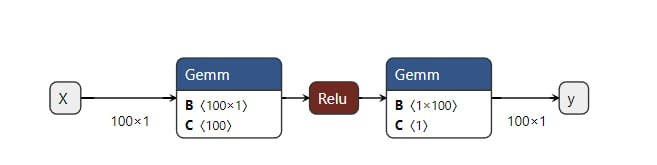

- [ ] Проверено на семинаре

In [118]:
X = th.linspace(0, 1, 100).view(-1, 1)
y = th.sin(2 * th.pi * X) + 0.1 * th.rand(X.size())
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [116]:
class InitializedNet(nn.Linear):
    def __init__(self, in_features, hidden, out_features, init_f=nn.init.uniform_, init_args=None):
        super().__init__(in_features, hidden, out_features)

        self.layer1 = nn.Linear(in_features, hidden)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden, out_features)

        if init_args is not None:
            init_f(self.layer1.weight, **init_args)
            init_f(self.layer2.weight, **init_args)
        else:
            init_f(self.layer1.weight)
            init_f(self.layer2.weight)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

In [120]:
criterion = nn.MSELoss()
learning_rate = 0.0001
epochs = 500

initialization_methods = [nn.init.uniform_, nn.init.normal_, lambda w: nn.init.constant_(w, val = 0.5), nn.init.xavier_uniform_, nn.init.kaiming_uniform_]
method_names = ['Uniform', 'Normal', 'Constant', 'Xavier Uniform', 'Kaiming Uniform']
colors = ['r', 'g', 'b', 'c', 'm']

mse_values = [[], [], [], [], []]
for i, init_method in enumerate(initialization_methods):
    model = InitializedNet(1, 100, 1, init_f=init_method)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        output = model(X)
        loss = criterion(output, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        mse_values[i].append(loss.item())

fig = go.Figure([
        go.Scatter(name = 'Uniform', x = torch.arange(epochs), y = mse_values[0]),
        go.Scatter(name = 'Normal', x = torch.arange(epochs), y = mse_values[1]),
        go.Scatter(name = 'Constant', x = torch.arange(epochs), y = mse_values[2]),
        go.Scatter(name = 'Xavier Uniform', x = torch.arange(epochs), y = mse_values[3]),
        go.Scatter(name = 'Kaiming Uniform', x = torch.arange(epochs), y = mse_values[4]),])

fig.show()

<p class="task" id="3"></p>

### 3
Исследуйте, как добавление дропаута влияет на процесс обучения модели. Решите задачу регрессии несколько раз, изменяя значения вероятности дропаута $p$ от 0 до 0.8. В качестве модели рассмотрите нейронную сеть с одним скрытым слоем.

Визуализируйте график изменения значений $R^2$ в зависимости от вероятности дропаута $p$ на обучающей и тестовой выборке. Визуализируйте на отдельном графике зависимости разности между $R^2$ на обучающей выборки и $R^2$ на тестовой выборке.

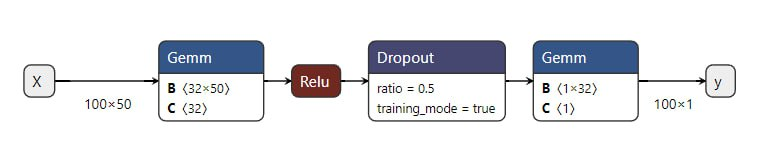

- [ ] Проверено на семинаре

In [5]:
th.manual_seed(42)
X, y, coef = make_regression(
    n_samples=100,
    n_features=50,
    n_informative=20,
    noise=2,
    coef=True,
    random_state=42,

)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)
X.shape, y.shape

(torch.Size([100, 50]), torch.Size([100, 1]))

In [6]:
class InitializedNetWithDropout(nn.Module):
    def __init__(self, in_features, hidden, out_features, dropout_prob, init_f=nn.init.uniform_, init_args=None):
        super(InitializedNetWithDropout, self).__init__()

        self.layer1 = nn.Linear(in_features, hidden)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_prob)
        self.layer2 = nn.Linear(hidden, out_features)

        if init_args is not None:
            init_f(self.layer1.weight, **init_args)
            init_f(self.layer2.weight, **init_args)
        else:
            init_f(self.layer1.weight)
            init_f(self.layer2.weight)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.layer2(x)
        return x

In [7]:
dropouts = np.linspace(0, 0.8, 9)

train_r2_values = []
test_r2_values = []

for dropout_prob in dropouts:
    model = InitializedNetWithDropout(50, 32, 1, dropout_prob)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    for epoch in range(1000):
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        predicted_train = model(X_train)
        r2_train = r2_score(y_train, predicted_train)
        train_r2_values.append(r2_train)

    model.eval()
    with torch.no_grad():
        predicted_test = model(X_test)
        r2_test = r2_score(y_test, predicted_test)
        test_r2_values.append(r2_test)

In [8]:
fig = go.Figure([
    go.Scatter(name = 'Train R²', x = dropouts, y = train_r2_values),
    go.Scatter(name = 'Test R²', x = dropouts, y = test_r2_values),])

fig.show()

In [9]:
fig = go.Figure(go.Scatter(name = 'Difference', x = dropouts, y = np.array(train_r2_values) - np.array(test_r2_values)),)
fig.update_layout(showlegend=True)
fig.show()

<p class="task" id="4"></p>

### 4
Решите задачу регрессии с- и без использования пакетной нормализации. Покажите, как меняется результат обучения моделей при различных значениях скорости обучения (0.001, 0.01, 0.1) за одно и то же количество эпох.

Визуализируйте график изменения значений $R^2$ в зависимости от эпохи при различных значениях скорости обучения с- и без использования пакетной нормализации.

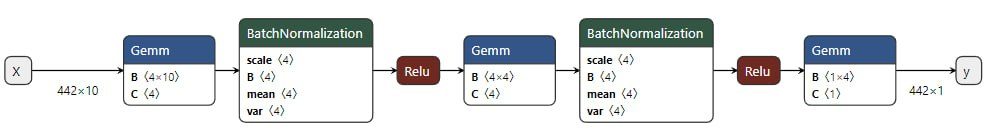

- [ ] Проверено на семинаре

In [84]:
X, y = load_diabetes(return_X_y=True)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)
y = (y - y.mean())/y.std()
X.shape, y.shape

(torch.Size([442, 10]), torch.Size([442, 1]))

In [85]:
lr_list = [0.001, 0.01, 0.1]

r2_values_model1 = [[], [], []]
r2_values_model2 = [[], [], []]

for i, lr in enumerate(lr_list):
    model1 = nn.Sequential(
            nn.Linear(10, 4),
            nn.BatchNorm1d(num_features=4),
            nn.ReLU(),
            nn.Linear(4, 4),
            nn.BatchNorm1d(num_features=4),
            nn.ReLU(),
            nn.Linear(4, 1)
)
    model2 = nn.Sequential(
            nn.Linear(10, 4),
            nn.ReLU(),
            nn.Linear(4, 4),
            nn.ReLU(),
            nn.Linear(4, 1)
)
    criterion1 = nn.MSELoss()
    optimizer1 = optim.SGD(model1.parameters(), lr=lr)
    criterion2 = nn.MSELoss()
    optimizer2 = optim.SGD(model2.parameters(), lr=lr)

    for epoch in range(1000):
        optimizer1.zero_grad()
        output1 = model1(X)
        loss = criterion1(output1, y)
        loss.backward()
        optimizer1.step()
        r2_values_model1[i].append(r2_score(y, output1.detach()))

        optimizer2.zero_grad()
        output2 = model2(X)
        loss = criterion2(output2, y)
        loss.backward()
        optimizer2.step()
        r2_values_model2[i].append(r2_score(y, output2.detach()))

In [86]:
fig = go.Figure([
    go.Scatter(name = 'R² w/ BatchNormalization lr = 0.001', x = torch.arange(epochs), y = r2_values_model1[0]),
    go.Scatter(name = 'R² w/ BatchNormalization lr = 0.01', x = torch.arange(epochs), y = r2_values_model1[1]),
    go.Scatter(name = 'R² w/ BatchNormalization lr = 0.1', x = torch.arange(epochs), y = r2_values_model1[2]),
    go.Scatter(name = 'R² w/o BatchNormalization lr = 0.001', x = torch.arange(epochs), y = r2_values_model2[0]),
    go.Scatter(name = 'R² w/o BatchNormalization lr = 0.01', x = torch.arange(epochs), y = r2_values_model2[1]),
    go.Scatter(name = 'R² w/o BatchNormalization lr = 0.1', x = torch.arange(epochs), y = r2_values_model2[2])])

fig.show()

<p class="task" id="5"></p>

### 5
Решите задачу регрессии c использованием различных алгоритмов градиентного спуска. Покажите, как меняется результат обучения моделей при использовании различных алгоритмов (Adam, Adagram, RMSProp, SGD) за одно и то же количество эпох с одной и той же скоростью обучения.

Визуализируйте график изменения значений MAPE в зависимости от эпохи при использовании различных алгоритмов градиентного спуска.

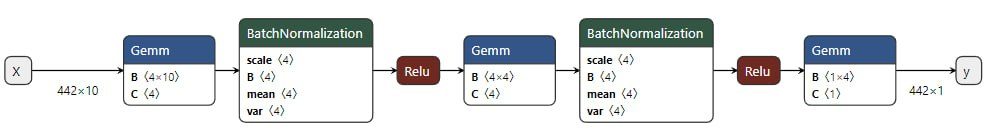

- [ ] Проверено на семинаре

In [87]:
def load_boston():
    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    return data, target

In [108]:
X, y = load_boston()
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)
X.shape, y.shape

(torch.Size([506, 13]), torch.Size([506, 1]))

In [113]:
num_epochs = 100
learning_rate = 0.001

mape_values = [[], [], [], []]

model1 = nn.Sequential(nn.Linear(13, 4), nn.BatchNorm1d(num_features=4), nn.ReLU(),
                        nn.Linear(4, 4), nn.BatchNorm1d(num_features=4), nn.ReLU(), nn.Linear(4, 1))
model2 = nn.Sequential(nn.Linear(13, 4), nn.BatchNorm1d(num_features=4), nn.ReLU(),
                        nn.Linear(4, 4), nn.BatchNorm1d(num_features=4), nn.ReLU(), nn.Linear(4, 1))
model3 = nn.Sequential(nn.Linear(13, 4), nn.BatchNorm1d(num_features=4), nn.ReLU(),
                        nn.Linear(4, 4), nn.BatchNorm1d(num_features=4), nn.ReLU(), nn.Linear(4, 1))
model4 = nn.Sequential(nn.Linear(13, 4), nn.BatchNorm1d(num_features=4), nn.ReLU(),
                        nn.Linear(4, 4), nn.BatchNorm1d(num_features=4), nn.ReLU(), nn.Linear(4, 1))
    
optimizer1 = optim.Adam(model1.parameters(), lr=lr)
optimizer2 = optim.Adagrad(model2.parameters(), lr=lr)
optimizer3 = optim.RMSprop(model3.parameters(), lr=lr)
optimizer4 = optim.SGD(model4.parameters(), lr=lr)


criterion = nn.MSELoss()

for epoch in range(num_epochs):
    optimizer1.zero_grad()
    optimizer2.zero_grad()
    optimizer3.zero_grad()
    optimizer4.zero_grad()

    outputs1 = model1(X)
    outputs2 = model2(X)
    outputs3 = model3(X)
    outputs4 = model4(X)

    loss1 = criterion(outputs1, y)
    loss2 = criterion(outputs2, y)
    loss3 = criterion(outputs3, y)
    loss4 = criterion(outputs4, y)

    mape_values[0].append(mean_absolute_percentage_error(y, outputs1.detach()))
    mape_values[1].append(mean_absolute_percentage_error(y, outputs2.detach()))
    mape_values[2].append(mean_absolute_percentage_error(y, outputs3.detach()))
    mape_values[3].append(mean_absolute_percentage_error(y, outputs4.detach()))
        
    loss1.backward()
    loss2.backward()
    loss3.backward()
    loss4.backward()

    optimizer1.step()
    optimizer2.step()
    optimizer3.step()
    optimizer4.step()

fig = go.Figure([
    go.Scatter(name = 'Adam', x = torch.arange(epochs), y = mape_values[0]),
    go.Scatter(name = 'Adagrad', x = torch.arange(epochs), y = mape_values[1]),
    go.Scatter(name = 'RMSProp', x = torch.arange(epochs), y = mape_values[2]),
    go.Scatter(name = 'SGD', x = torch.arange(epochs), y = mape_values[3]),
    ])

fig.show()

<p class="task" id="6"></p>

### 6
Решите задачу регрессии c использованием ранней остановки. Разбейте набор данных на обучающую и валидационную выборку в соотношении 80 на 20. Остановите процесс обучения, если целевая метрика (MAPE) не увеличивалась в течении последних $k$ ($k$ - гиперпараметр метода) эпох. В момент остановки выведите сообщение с текущим номером эпохи.

- [ ] Проверено на семинаре

In [12]:
X, y = load_boston()
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)
X.shape, y.shape

(torch.Size([506, 13]), torch.Size([506, 1]))

In [13]:
class InitializedNet(nn.Module):
    def __init__(self, in_features, hidden, out_features, init_f=nn.init.uniform_, init_args=None):
        super(InitializedNet, self).__init__()

        self.layer1 = nn.Linear(in_features, hidden)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden, out_features)

        if init_args is not None:
            init_f(self.layer1.weight, **init_args)
            init_f(self.layer2.weight, **init_args)
        else:
            init_f(self.layer1.weight)
            init_f(self.layer2.weight)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

In [109]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = InitializedNet(13, 10, 1)

criterion = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

k = 10
best_val_loss = 100000
no_improvement_count = 0

epochs = 1000

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    model.eval()
    val_outputs = model(X_val)
    val_loss = mean_absolute_percentage_error(y_val, val_outputs.detach())

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    if no_improvement_count >= k:
        print(f'Ранняя остановка на эпохе {epoch + 1}, так как целевая метрика не увеличивалась в течении последних {k} эпох (Test Loss = {val_loss})')
        break

Ранняя остановка на эпохе 248, так как целевая метрика не увеличивалась в течении последних 10 эпох (Test Loss = 0.3038283884525299)


## Обратная связь
- [x] Хочу получить обратную связь по решению